In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def partical_pca(traj,residue_selection):
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection))
    ppca = PCA(n_components=2)
    partical_reduced_cartesian = ppca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    print(traj.n_atoms)
    print(partical_reduced_cartesian.shape)
    print(ppca.explained_variance_ratio_)
    fig = plt.figure()
    plt.scatter(partical_reduced_cartesian[:,0], partical_reduced_cartesian[:,1],c=traj.time,marker='x')
    cbar = plt.colorbar()
    plt.scatter(partical_reduced_cartesian[42,0], partical_reduced_cartesian[42,1],marker='o',c='red')
    plt.scatter(partical_reduced_cartesian[44,0], partical_reduced_cartesian[44,1],marker='o',c='orange')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Partical PCA for ' + residue_selection)
    cbar.set_label('states')
    plt.show()

/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


(46, 2)
[0.42024871 0.28641018]


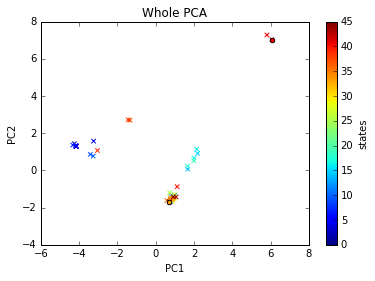

In [4]:
wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
wholetraj.superpose(wholetraj,42)
wholepca = PCA(n_components=2)
#wholepca.fit(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
whole_reduced_cartesian = wholepca.fit_transform(wholetraj.xyz.reshape(wholetraj.n_frames, wholetraj.n_atoms * 3))
print(whole_reduced_cartesian.shape)
print(wholepca.explained_variance_ratio_)
fig = plt.figure()
plt.scatter(whole_reduced_cartesian[:,0], whole_reduced_cartesian[:,1],c=wholetraj.time,marker='x')
cbar = plt.colorbar()
plt.scatter(whole_reduced_cartesian[42,0], whole_reduced_cartesian[42,1],marker='o',c='red')
plt.scatter(whole_reduced_cartesian[44,0], whole_reduced_cartesian[44,1],marker='o',c='orange')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Whole PCA')
cbar.set_label('states')
plt.show()

In [20]:
def normalization(traj):
    avg_xyz = np.mean(traj.xyz[:, :, :], axis=0)
    rmsf = np.sqrt(3*np.mean((traj.xyz[:, :, :] - avg_xyz)**2, axis=(0,2)))
    rmsf_data = pd.DataFrame({'RMSF':rmsf,'residue':list(range(0,1540))})
    for i in range (0,46):
        for j in range (0,1540):
            traj.xyz[i,j] = np.divide(traj.xyz[i,j],np.asarray(rmsf_data)[j,0])
    return traj

In [31]:
def partical_pca(traj,residue_selection):
    topology = traj.topology
    traj = traj.atom_slice(topology.select(residue_selection))
    ppca = PCA(n_components=2)
    partical_reduced_cartesian = ppca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
    print(traj.n_atoms)
    print(partical_reduced_cartesian.shape)
    print(ppca.explained_variance_ratio_)
    fig = plt.figure()
    plt.scatter(partical_reduced_cartesian[:,0], partical_reduced_cartesian[:,1],c=traj.time,marker='x')
    cbar = plt.colorbar()
    plt.scatter(partical_reduced_cartesian[42,0], partical_reduced_cartesian[42,1],marker='o',c='red')
    plt.scatter(partical_reduced_cartesian[44,0], partical_reduced_cartesian[44,1],marker='o',c='orange')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Partical PCA for ' + residue_selection)
    cbar.set_label('states')
    plt.show()

In [33]:
wholetraj = md.load("/home/scottzhuang/tests/ensemble/whole.pdb")
wholetraj.superpose(wholetraj,42)

/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/scottzhuang/anaconda3/envs/deepchemistry/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


<mdtraj.Trajectory with 46 frames, 1540 atoms, 1540 residues, without unitcells at 0x2ab890029f28>

1540
(46, 2)
[0.42018677 0.24056004]


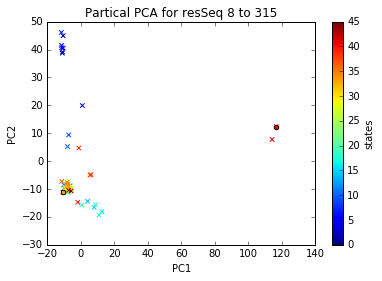

In [23]:
partical_pca(normalization(wholetraj),"resSeq 8 to 315")

25
(46, 2)
[0.94528895 0.03511712]


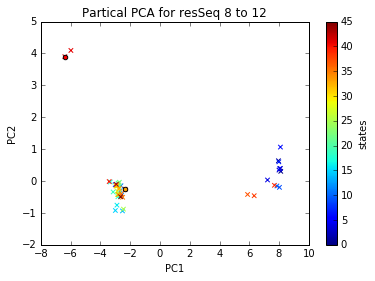

In [32]:
partical_pca(normalization(wholetraj),"resSeq 8 to 12")

1515
(46, 2)
[0.42538362 0.23476383]


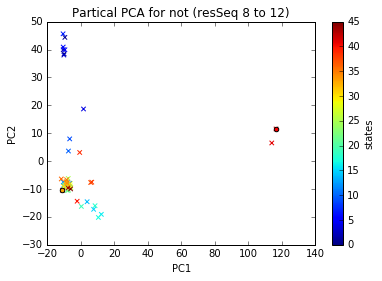

In [25]:
#without res 8 to 12
partical_pca(wholetraj,"not (resSeq 8 to 12)")

In [27]:
def find_best_partical_pca_start(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        residue_selection = 'resSeq 8 to ' + str(i)
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        ppca = PCA(n_components=2)
        partical_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [34]:
pc_start = find_best_partical_pca_start(normalization(wholetraj))

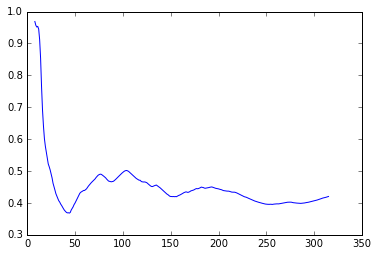

In [36]:
fig = plt.figure()
plt.plot(pc_start[:, 0],pc_start[:, 1])

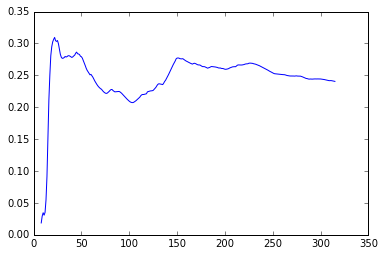

In [37]:
fig = plt.figure()
plt.plot(pc_start[:, 0],pc_start[:, 2])

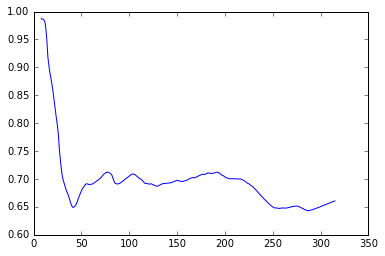

In [35]:
fig = plt.figure()
plt.plot(pc_start[:, 0],pc_start[:, 1] + pc_start[:, 2])

In [38]:
def find_best_partical_pca_end(traj):
    topology = traj.topology
    pc1 = []
    for i in range (8,316):
        residue_selection = 'resSeq ' + str(i) + ' to 315'
        traj_slice = traj.atom_slice(topology.select(residue_selection))
        ppca = PCA(n_components=2)
        partical_reduced_cartesian = ppca.fit_transform(traj_slice.xyz.reshape(traj_slice.n_frames, traj_slice.n_atoms * 3))
        pc1.append([i,ppca.explained_variance_ratio_[0],ppca.explained_variance_ratio_[1]])
    return np.asarray(pc1)

In [39]:
pc_end = find_best_partical_pca_end(normalization(wholetraj))

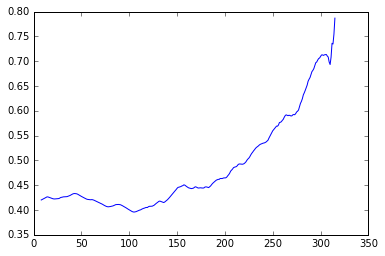

In [41]:
fig = plt.figure()
plt.plot(pc_end[:, 0],pc_end[:, 1])

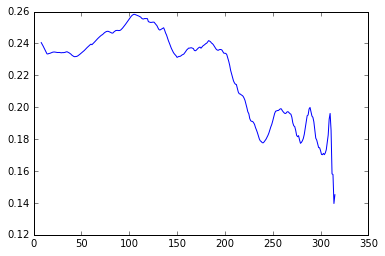

In [42]:
fig = plt.figure()
plt.plot(pc_end[:, 0],pc_end[:, 2])

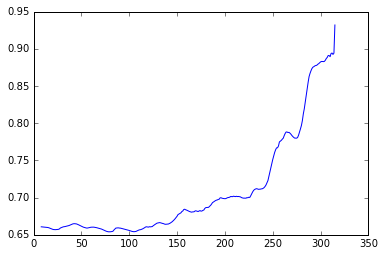

In [40]:
fig = plt.figure()
plt.plot(pc_end[:, 0],pc_end[:, 1] + pc_end[:, 2])